In [1]:
import pandas as pd
df = pd.read_csv('lyrics_clean_utf8.csv')

In [2]:
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace("'",'')
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace('"','')
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords
0,0,ego-remix,2009,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut..."
1,1,then-tell-me,2009,Pop,"[playin, everything, so, easy, it, s, like, yo...",270,"['playin', 'everything', 'easy', ""'s"", 'like',..."
2,2,honesty,2009,Pop,"[if, you, search, for, tenderness, it, is, nt,...",177,"['search', 'tenderness', ""n't"", 'hard', 'find'..."
3,3,you-are-my-rock,2009,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, 1, if, i...",555,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'verse', ..."
4,4,black-culture,2009,Pop,"[party, the, people, the, people, the, party, ...",338,"['party', 'people', 'people', 'party', ""'s"", '..."


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
df['compound_score'] = df['word_tokenize_no_punctuation'].apply(lambda x: sid.polarity_scores(x).get('compound'))
#erstellt eine neue Spalte mit den compound score
#score >= 0.5 positiv score <= -0.5 negativ und sonst neutraler Song

C:\Users\Steven\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords,compound_score
0,0,ego-remix,2009,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...",0.9983
1,1,then-tell-me,2009,Pop,"[playin, everything, so, easy, it, s, like, yo...",270,"['playin', 'everything', 'easy', ""'s"", 'like',...",0.9893
2,2,honesty,2009,Pop,"[if, you, search, for, tenderness, it, is, nt,...",177,"['search', 'tenderness', ""n't"", 'hard', 'find'...",0.9860
3,3,you-are-my-rock,2009,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, 1, if, i...",555,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'verse', ...",0.9993
4,4,black-culture,2009,Pop,"[party, the, people, the, people, the, party, ...",338,"['party', 'people', 'people', 'party', ""'s"", '...",-0.9493


In [5]:
def compound_score_counter(df,liste,category):
    '''
    Methode um ein Datenframe zu erstellen mit den Spalten Jahr,Anzahl negativer Songs,positiver Songs,neutraler Songs
    in der Spaltenreihenfolge 0,1,2,3 == Jahr,Anzahl negativ, Anzahl positiv, Anzahl neutral
    '''
    dataframe = pd.DataFrame()
    for items in liste:
        liste = list([items,df[(df[category] == items )& (df['compound_score']<=-0.5)].apply(len)[0], df[(df[category] == items ) & (df['compound_score']>=0.5)].apply(len)[0],df[(df[category] == items )& ((df['compound_score']<0.5)|(df['compound_score']>-0.5))].apply(len)[0]]) 
        dataframe = dataframe.append(pd.DataFrame([liste]))
    return dataframe

In [6]:
yearList = list(set(df['year']))
genreList = list(set(df['genre']))
#erstellt eine Liste mit den Jahren und Genren

counted_score_per_year = compound_score_counter(df,yearList,'year')
counted_score_per_genre = compound_score_counter(df,genreList,'genre')
#nutzt die oben definierte Funktion um einen Datenframe zu erstellen mit den Anzahl des auftauchens
counted_score_per_genre.head()

,0,1,2,3
0,Pop,9800,25036,40139
0,Indie,917,1647,3097
0,Hip-Hop,13472,9217,24573
0,Folk,500,1107,2077
0,Metal,14162,5079,22569


In [7]:
counted_score_per_year.head()

,0,1,2,3
0,1970,41,101,165
0,1971,51,112,195
0,1972,49,113,190
0,1973,48,170,244
0,1974,42,82,158


In [8]:
counted_score_without_year = pd.DataFrame()
counted_score_without_year[['negativ','positiv','neutral']] = counted_score_per_year[counted_score_per_year.columns[1:4]]

average1 = counted_score_without_year.divide(counted_score_without_year.sum(axis=1), axis=0)
average1['year'] = counted_score_per_year[counted_score_per_year.columns[:1]]
average1.head()

#hier wird ein Datenframe average erstellt mit dem Prozentuallen Anteil in jeder Zeile
#im unseren Fall wird jedes Jahr der Prozentualler Anteil berechnet

,negativ,positiv,neutral,year
0,0.133550,0.328990,0.537459,1970
0,0.142458,0.312849,0.544693,1971
0,0.139205,0.321023,0.539773,1972
0,0.103896,0.367965,0.528139,1973
0,0.148936,0.290780,0.560284,1974


In [9]:
counted_score_without_genre = pd.DataFrame()
counted_score_without_genre[['negativ','positiv','neutral']] = counted_score_per_genre[counted_score_per_year.columns[1:4]]

average2 = counted_score_without_genre.divide(counted_score_without_genre.sum(axis=1), axis=0)
average2['genre'] = counted_score_per_genre[counted_score_per_genre.columns[:1]]
average2.head()
#hier wird ein Datenframe average erstellt mit dem Prozentuallen Anteil in jeder Zeile
#im unseren Fall wird in jeder Genre der Prozentualler Anteil berechnet

,negativ,positiv,neutral,genre
0,0.130710,0.333925,0.535365,Pop
0,0.161986,0.290938,0.547076,Indie
0,0.285049,0.195019,0.519931,Hip-Hop
0,0.135722,0.300489,0.563789,Folk
0,0.338723,0.121478,0.539799,Metal


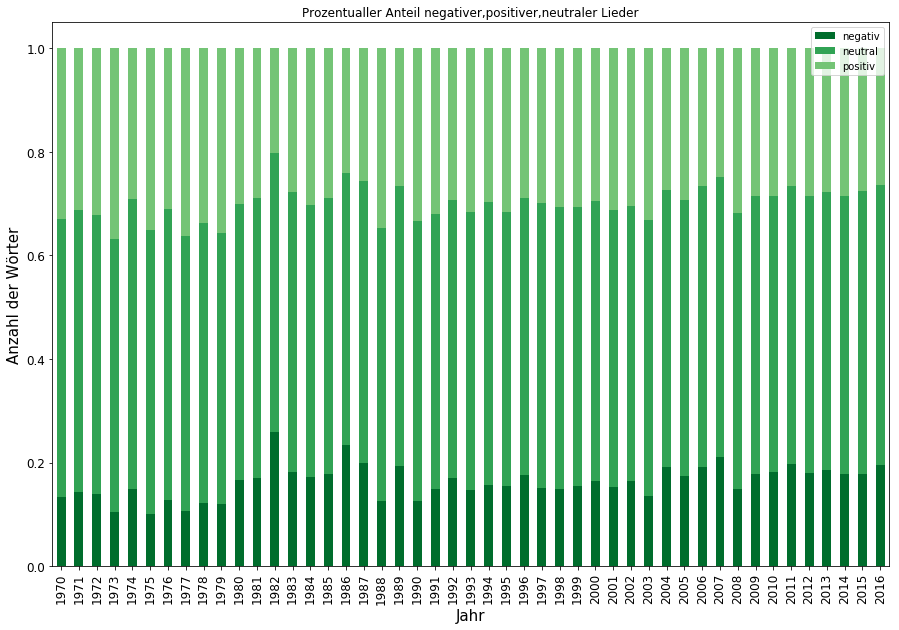

In [10]:
import numpy as np
import matplotlib.pyplot as plt

colors = ["#006D2C", "#31A354","#74C476"]
ax = average1.plot.bar(x = 'year', y = ['negativ','neutral','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

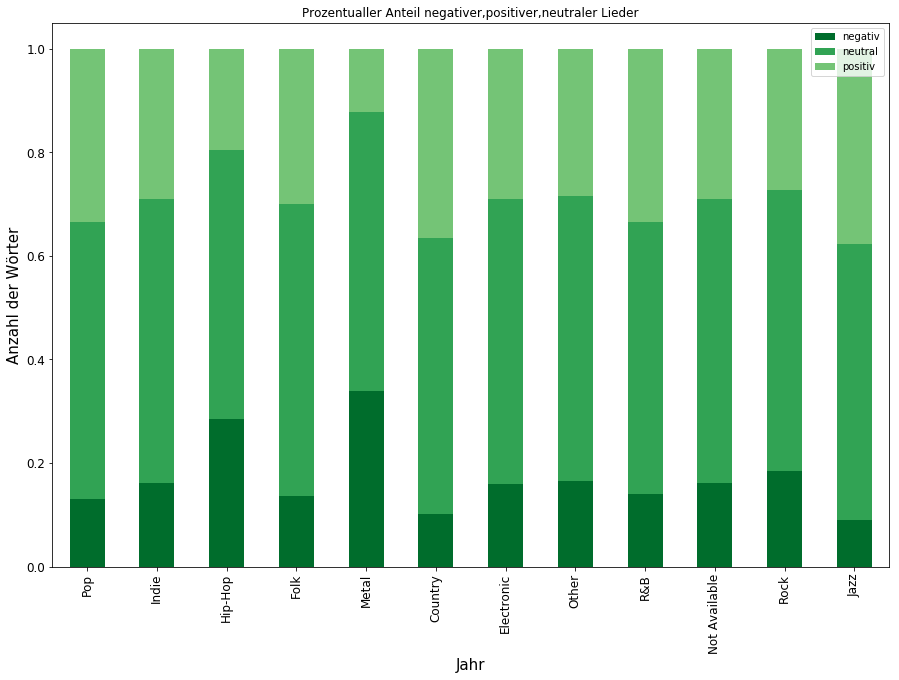

In [11]:
colors = ["#006D2C", "#31A354","#74C476"]
ax = average2.plot.bar(x = 'genre', y = ['negativ','neutral','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

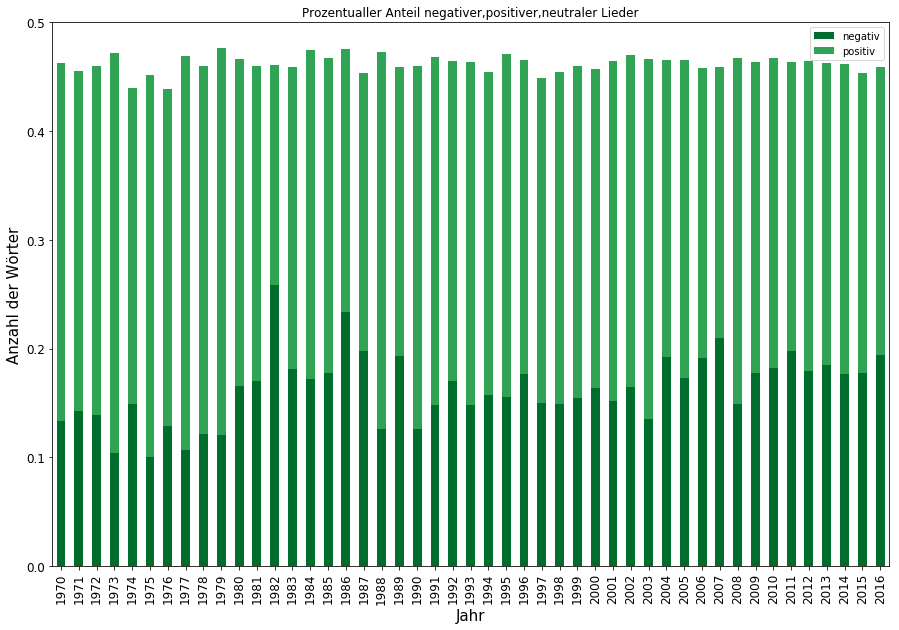

In [13]:
colors = ["#006D2C", "#31A354","#74C476"]
ax = average1.plot.bar(x = 'year', y = ['negativ','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

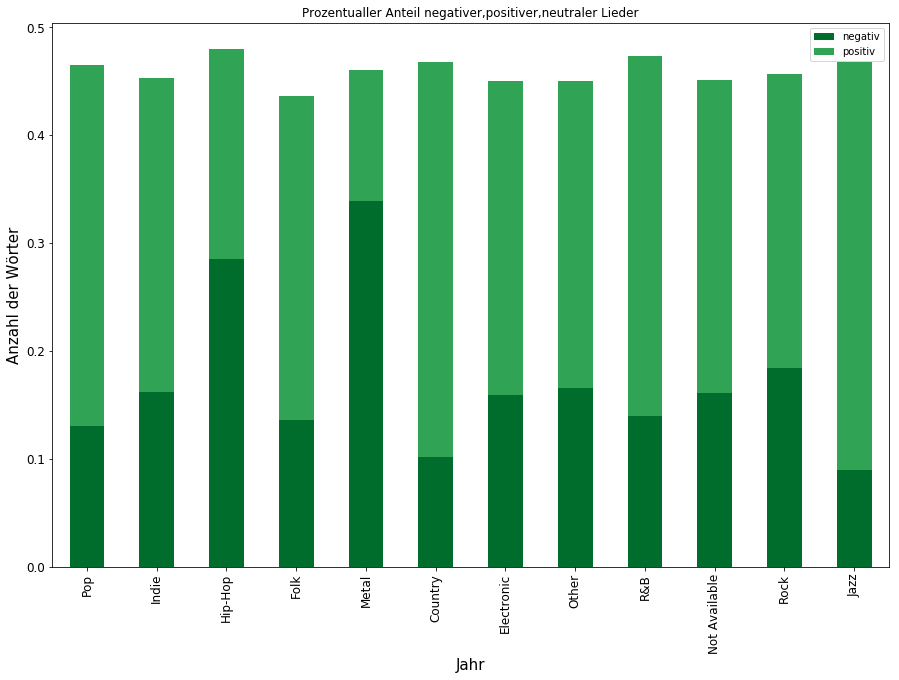

In [12]:
colors = ["#006D2C", "#31A354","#74C476"]
ax = average2.plot.bar(x = 'genre', y = ['negativ','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()